17.2  Risk-return trade-off in portfolio optimization

In [57]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
p = np.array([0.12, 0.1, 0.07, 0.03])
Sigma = np.array([[0.0064 , 0.0008, -0.0011, 0], 
                    [0.0008, 0.0025, 0, 0], 
                    [-0.0011, 0, 0.0004, 0], 
                    [0, 0, 0, 0]])

In [51]:
mus = np.logspace(0, 7, num=100)
opt_portfolio, expected_return, std = [], [], []
for mu in mus:
    x = cp.Variable(4, nonneg=True)
    objective = cp.Minimize(- p @ x + mu * cp.quad_form(x, Sigma))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    opt_portfolio.append(x.value)
    expected_return.append(p @ x.value)
    std.append((x.value.T @ Sigma @ x.value) ** 0.5)

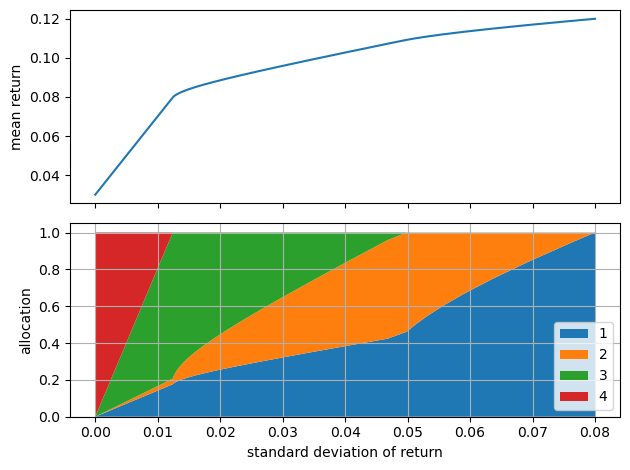

In [52]:
portfolios = np.array(opt_portfolio)
returns = np.array(expected_return)
std_deviations = np.array(std)

# Sort the portfolios and standard deviations in ascending order
sort_indices = np.argsort(std_deviations)
portfolios = portfolios[sort_indices]
returns = returns[sort_indices]
std_deviations = std_deviations[sort_indices]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(std_deviations,returns)
ax1.set_ylabel('mean return')
ax2.stackplot(std_deviations, portfolios.T, labels=['1', '2', '3', '4'])
ax2.set_xlabel('standard deviation of return')
ax2.set_ylabel('allocation')
ax2.legend(loc='lower right')
ax2.grid(True)
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

$p\sim N(\bar{p},\Sigma)\Rightarrow p^Tx\sim N(\bar{p}^Tx,x^T\Sigma x)$

$\sqrt{x^T\Sigma x}=\lVert \Sigma^{\frac{1}{2}}x \rVert_2$

In [147]:
from scipy.stats import norm
from scipy.linalg import sqrtm
etas = np.logspace(-4, -1, 100)
opt_portfolio, expected_return = [], []
for eta in etas:
    x = cp.Variable(4, nonneg=True)
    objective = cp.Maximize(p @ x)
    # norm.ppf is the inverse of the cdf of normal distribution
    # Note that eta < 0.5, so norm.ppf(eta) is negative
    # Second-order cone programming
    constraints = [cp.sum(x) == 1, - p @ x <= norm.ppf(eta) * cp.norm(sqrtm(Sigma) @ x)] 
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    opt_portfolio.append(x.value)
    expected_return.append(p @ x.value)
portfolios = np.array(opt_portfolio)
returns = np.array(expected_return)

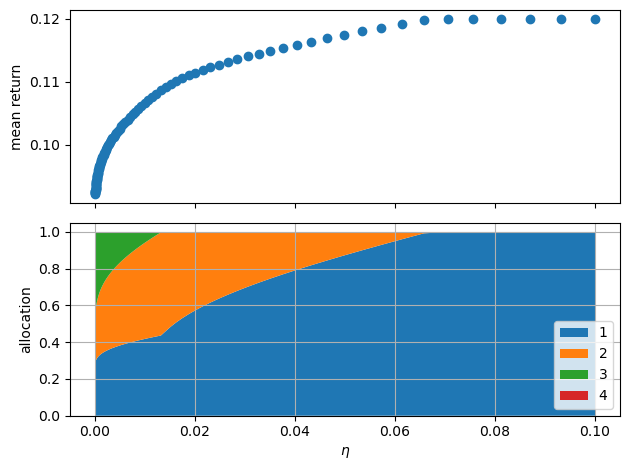

In [148]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.scatter(etas, returns)
ax1.set_ylabel('mean return')
ax2.stackplot(etas, portfolios.T, labels=['1', '2', '3', '4'])
ax2.set_xlabel('$\eta$')
ax2.set_ylabel('allocation')
ax2.legend(loc='lower right')
ax2.grid(True)
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

0.11735040786166184
0.0493


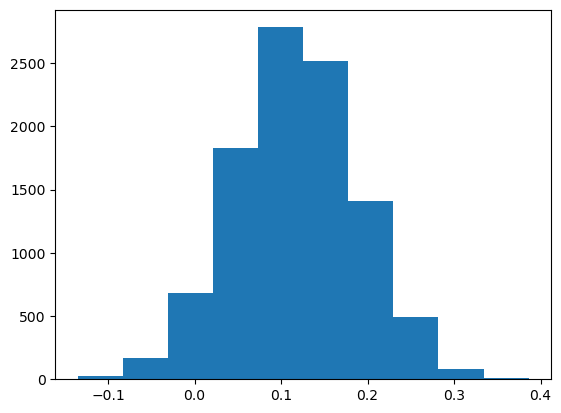

In [150]:
samples = np.random.multivariate_normal(p, Sigma, 10000)
x = cp.Variable(4, nonneg=True)
objective = cp.Maximize(p @ x)
# norm.ppf is the inverse of the cdf of normal distribution
constraints = [cp.sum(x) == 1, - p @ x <= norm.ppf(0.05) * cp.norm(sqrtm(Sigma) @ x, 2)] # Note that eta < 0.5, so norm.ppf(eta) is negative
prob = cp.Problem(objective, constraints)
result = prob.solve()
sample_returns = samples @ x.value
print(np.mean(sample_returns)) 
print(np.sum(sample_returns <= 0) / 10000)
plt.hist(sample_returns)
plt.show()